## Import the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import pickle

In [2]:
## Load the dataset
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [6]:
## Unique category
# Unique categories
unique_categories = df['Category'].unique()
print(f"Unique categories: {unique_categories}")

Unique categories: ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [7]:
# Total number of unique categories
num_unique_categories = df['Category'].nunique()
print(f"Total unique categories: {num_unique_categories}")

Total unique categories: 25


In [8]:
# Counts of each unique category
category_counts = df['Category'].value_counts()
print(category_counts)

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


C:\Users\ANINDYA DAS\AppData\Local\Temp\ipykernel_23216\1864397790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], palette='pastel')


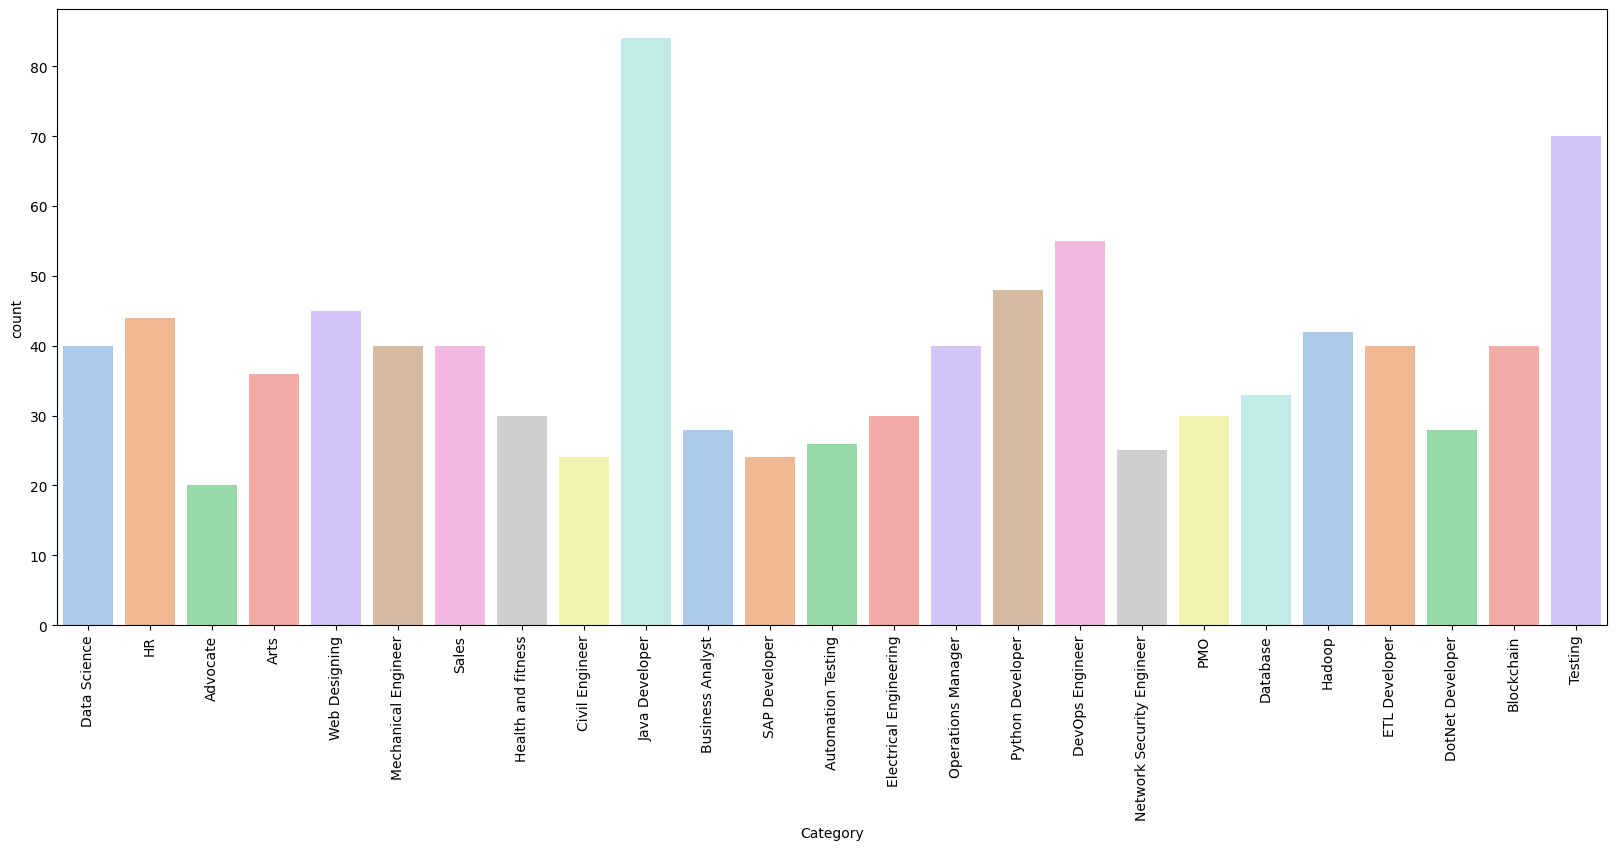

In [9]:
# Visualize the category distribution using a bar plot
plt.figure(figsize=(20, 8))
sns.countplot(x=df['Category'], palette='pastel')
plt.xticks(rotation=90)
plt.show()


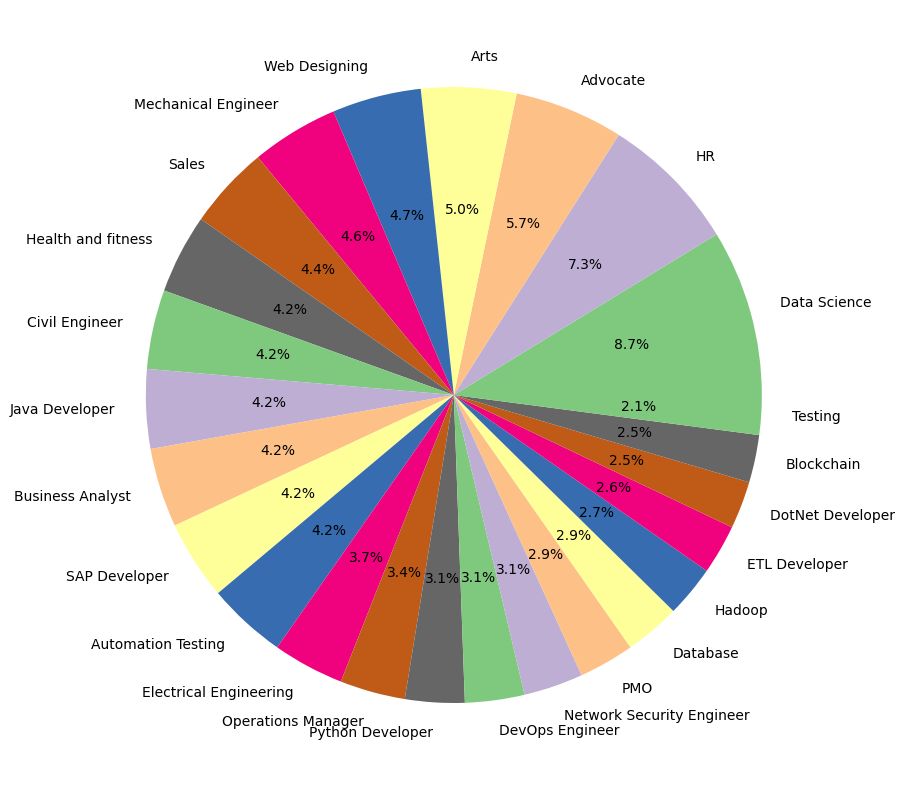

In [10]:
# Visualize the category distribution using a pie chart
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=unique_categories, colors=plt.get_cmap('Accent').colors, autopct="%1.1f%%")
plt.show()


## Clear the resume column

In [11]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [12]:
## lets check the 1st row
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## clean data
    1. URls
    2. hashtags
    3. mentions
    4. special letters
    5. punctuations

In [13]:
import re

# Function to clean the resume text
def clean_data(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuations
    text = re.sub(r'\s+', ' ', text).strip()  # Remove additional whitespace
    return text

# Example usage
sample_text = "Check out our website https://example.com @username! #example #AI :) ; % ${} []"
cleaned_text = clean_data(sample_text)
print(cleaned_text)


Check out our website


Clean the resume Column

In [14]:
# Apply the cleaning function to the 'Resume' column
df['Resume'] = df['Resume'].apply(clean_data)

In [15]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the revi

## Its a supervised learning and lets convert the "Category" column into numerical

In [16]:
# Convert 'Category' column into numerical values
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])


In [17]:
# Vectorize the 'Resume' column using TF-IDF and remove stop words
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Resume'])

## Split the Data

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.2, random_state=42)

## Train the model

In [20]:
# Initialize the K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier on the training data
knn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [22]:
# Calculate the training and testing accuracy
train_accuracy = knn_clf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

In [23]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9883
Testing Accuracy: 0.9845


In [24]:
# Use OneVsRestClassifier for multiclass classification
ovr_clf = OneVsRestClassifier(KNeighborsClassifier())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [25]:
# Predict the labels for the test set using the OneVsRest classifier
y_pred_ovr = ovr_clf.predict(X_test)

In [27]:
# Calculate the accuracy for OneVsRestClassifier
ovr_accuracy = accuracy_score(y_test, y_pred_ovr)
print(f"OneVsRestClassifier Testing Accuracy: {ovr_accuracy:.4f}")

OneVsRestClassifier Testing Accuracy: 0.9845


## Create a prediction system

In [28]:
# Save the trained TF-IDF vectorizer and model using pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(ovr_clf, open('model.pkl', 'wb'))


In [29]:
resume = """Detail-oriented Data Scientist with 3+ years of experience in analyzing complex datasets, building predictive models, and developing data-driven solutions to drive business performance. Proficient in Python, SQL, and machine learning techniques. Passionate about leveraging data to solve real-world problems and improve decision-making processes.

Skills
Programming Languages: Python (pandas, numpy, scikit-learn, matplotlib), SQL, R
Machine Learning: Regression, Classification, Clustering, SVM, Random Forest, Neural Networks
Data Visualization: Tableau, Power BI, Matplotlib, Seaborn
Big Data Technologies: Hadoop, Spark, Hive
Tools & Technologies: Jupyter Notebook, Git, Docker, TensorFlow, Keras
Database Management: MySQL, PostgreSQL, MongoDB
Experience
Data Scientist
ABC Corp, New York, NY
June 2021 – Present

Developed and deployed predictive models for customer churn, resulting in a 15% increase in customer retention.
Collaborated with cross-functional teams to design and implement data pipelines, reducing data processing time by 30%.
Conducted A/B testing and statistical analysis to optimize marketing campaigns, leading to a 20% increase in ROI.
Built interactive dashboards using Tableau to visualize key business metrics, enabling data-driven decision-making.
Junior Data Analyst
XYZ Ltd, Boston, MA
January 2020 – May 2021

Analyzed sales and customer data to identify trends and patterns, providing actionable insights to the sales team.
Automated data cleaning and preprocessing tasks using Python, reducing manual effort by 40%.
Assisted in the development of machine learning models for demand forecasting, improving forecast accuracy by 10%.
Education
Bachelor of Science in Computer Science
University of California, Los Angeles (UCLA)
Graduated: 2019

Certifications
Data Science Professional Certificate – Coursera
Machine Learning Specialization – Stanford University
Projects
Customer Segmentation using K-Means Clustering

Performed customer segmentation for an e-commerce company using K-Means clustering, leading to targeted marketing strategies and a 25% increase in sales.
Sentiment Analysis of Product Reviews

Developed a sentiment analysis model using Natural Language Processing (NLP) to analyze customer reviews, providing valuable insights for product improvement."""

In [30]:
resume_cleaned = clean_data(resume)
resume_vectorized = tfidf.transform([resume_cleaned])

In [31]:
# Predict the category of the resume
predicted_category = ovr_clf.predict(resume_vectorized)
predicted_category_name = le.inverse_transform(predicted_category)
print(f"Predicted Category: {predicted_category_name[0]}")

Predicted Category: Data Science
